In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print(datetime.datetime.now())

seed 2
2023-07-06 02:23:14.777875


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1028.7966)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(6.3024)tensor(6.3038)tensor(4.7618)tensor(5.8076)tensor(4.6371)tensor(4.5567)tensor(3.6252)tensor(3.6573)tensor(7.7413)tensor(9.5131)tensor(5.6762)tensor(3.2755)tensor(6.6687)tensor(3.7668)tensor(5.3158)tensor(5.0718)tensor(6.1821)tensor(3.8866)tensor(2.9834)tensor(5.0501)tensor(4.5854)tensor(7.4730)tensor(4.8885)tensor(3.3612)tensor(6.8171)tensor(3.2322)tensor(11.7585)tensor(5.0666)tensor(2.8060)tensor(4.5797)tensor(7.0227)tensor(3.3505)tensor(16.4386)tensor(6.5213)tensor(4.7116)tensor(4.2056)tensor(3.1767)tensor(7.7880)tensor(5.4924)tensor(4.8846)tensor(7.4346)tensor(6.3696)tensor(6.5462)tensor(7.2711)tensor(11.8115)tensor(4.1585)tensor(5.2911)tensor(3.2857)tensor(4.6550)tensor(6.9303)tensor(3.3737)tensor(4.0988)tensor(3.8723)tensor(7.2926)tensor(2.7963)tensor(6.7150)tensor(3.1209)tensor(9.3122)tensor(3.2712)tensor(4.3777)tensor(7.3764)tensor(6.7453)tensor(3.5045)tensor(6.5956)tensor(4.9907)tensor(6.4260)tensor(4.2254)tensor(3.8268)tensor(6.2504)tensor(6.6032)tensor(8.3116)ten

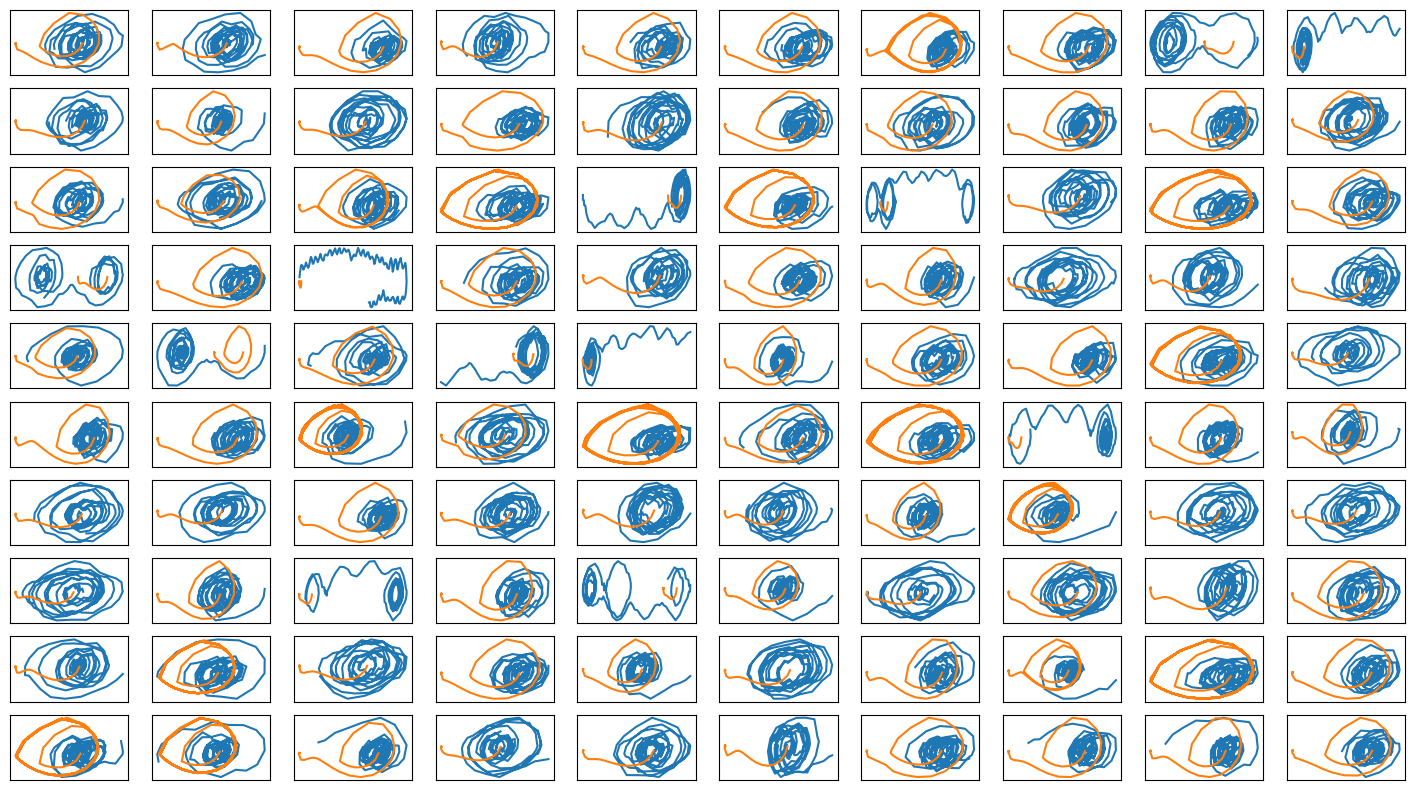

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 133926.58609  validloss 626.23046±0.00000  bestvalidloss 626.23046  last_update 0
train: iter 1  trainloss 12166718.95946  validloss 486.59120±0.00000  bestvalidloss 486.59120  last_update 0
train: iter 2  trainloss 17221.42943  validloss 473.12685±0.00000  bestvalidloss 473.12685  last_update 0
train: iter 3  trainloss 637.76086  validloss 476.03192±0.00000  bestvalidloss 473.12685  last_update 1
train: iter 4  trainloss 598.92202  validloss 478.89005±0.00000  bestvalidloss 473.12685  last_update 2
train: iter 5  trainloss 565.54692  validloss 473.91164±0.00000  bestvalidloss 473.12685  last_update 3
train: iter 6  trainloss 834.22232  validloss 459.31697±0.00000  bestvalidloss 459.31697  last_update 0
train: iter 7  trainloss 625.33962  validloss 438.61473±0.00000  bestvalidloss 438.61473  last_update 0
train: iter 8  trainloss 627.15809  validloss 437.66150±0.00000  bestvalidloss 437.66150  last_update 0
train: iter 9  trainloss 543.42537 

train: iter 79  trainloss -108.92848  validloss -143.66644±0.00000  bestvalidloss -151.36248  last_update 1
train: iter 80  trainloss -109.32415  validloss -170.28749±0.00000  bestvalidloss -170.28749  last_update 0
train: iter 81  trainloss -122.24754  validloss -171.86486±0.00000  bestvalidloss -171.86486  last_update 0
train: iter 82  trainloss -136.66630  validloss -187.56584±0.00000  bestvalidloss -187.56584  last_update 0
train: iter 83  trainloss -146.54095  validloss -189.26725±0.00000  bestvalidloss -189.26725  last_update 0
train: iter 84  trainloss -156.77140  validloss -214.43713±0.00000  bestvalidloss -214.43713  last_update 0
train: iter 85  trainloss -167.77144  validloss -218.32945±0.00000  bestvalidloss -218.32945  last_update 0
train: iter 86  trainloss -180.72466  validloss -238.09853±0.00000  bestvalidloss -238.09853  last_update 0
train: iter 87  trainloss -197.98742  validloss -247.54938±0.00000  bestvalidloss -247.54938  last_update 0
train: iter 88  trainloss -2

train: iter 155  trainloss -607.24414  validloss -689.12485±0.00000  bestvalidloss -689.12485  last_update 0
train: iter 156  trainloss -607.11934  validloss -646.99235±0.00000  bestvalidloss -689.12485  last_update 1
train: iter 157  trainloss -609.61235  validloss -679.94629±0.00000  bestvalidloss -689.12485  last_update 2
train: iter 158  trainloss -617.32633  validloss -678.57190±0.00000  bestvalidloss -689.12485  last_update 3
train: iter 159  trainloss -612.72355  validloss -670.85965±0.00000  bestvalidloss -689.12485  last_update 4
train: iter 160  trainloss -620.25826  validloss -679.96961±0.00000  bestvalidloss -689.12485  last_update 5
train: iter 161  trainloss -620.21619  validloss -694.30539±0.00000  bestvalidloss -694.30539  last_update 0
train: iter 162  trainloss -627.37419  validloss -696.43816±0.00000  bestvalidloss -696.43816  last_update 0
train: iter 163  trainloss -623.75902  validloss -694.01898±0.00000  bestvalidloss -696.43816  last_update 1
train: iter 164  tr

train: iter 231  trainloss -656.37835  validloss -736.92355±0.00000  bestvalidloss -748.31523  last_update 11
train: iter 232  trainloss -619.28706  validloss -733.39563±0.00000  bestvalidloss -748.31523  last_update 12
train: iter 233  trainloss -639.84652  validloss -713.82234±0.00000  bestvalidloss -748.31523  last_update 13
train: iter 234  trainloss -654.78778  validloss -733.78692±0.00000  bestvalidloss -748.31523  last_update 14
train: iter 235  trainloss -659.45441  validloss -747.63321±0.00000  bestvalidloss -748.31523  last_update 15
train: iter 236  trainloss -653.86835  validloss -717.44068±0.00000  bestvalidloss -748.31523  last_update 16
train: iter 237  trainloss -666.95530  validloss -745.39729±0.00000  bestvalidloss -748.31523  last_update 17
train: iter 238  trainloss -652.62040  validloss -716.51916±0.00000  bestvalidloss -748.31523  last_update 18
train: iter 239  trainloss -647.51028  validloss -696.68168±0.00000  bestvalidloss -748.31523  last_update 19
train: ite

train: iter 306  trainloss -660.68142  validloss -726.14340±0.00000  bestvalidloss -780.50690  last_update 13
train: iter 307  trainloss -581.90726  validloss -754.64330±0.00000  bestvalidloss -780.50690  last_update 14
train: iter 308  trainloss -610.70076  validloss -344.70898±0.00000  bestvalidloss -780.50690  last_update 15
train: iter 309  trainloss -666.43342  validloss -726.17024±0.00000  bestvalidloss -780.50690  last_update 16
train: iter 310  trainloss -646.64966  validloss -684.76489±0.00000  bestvalidloss -780.50690  last_update 17
train: iter 311  trainloss -669.67297  validloss -718.18131±0.00000  bestvalidloss -780.50690  last_update 18
train: iter 312  trainloss -660.68730  validloss -753.72610±0.00000  bestvalidloss -780.50690  last_update 19
train: iter 313  trainloss -644.36414  validloss -756.56301±0.00000  bestvalidloss -780.50690  last_update 20
train: iter 314  trainloss -675.69784  validloss -669.86441±0.00000  bestvalidloss -780.50690  last_update 21
train: ite

train: iter 381  trainloss -685.52444  validloss -752.62589±0.00000  bestvalidloss -789.58590  last_update 1
train: iter 382  trainloss -669.75810  validloss -786.08200±0.00000  bestvalidloss -789.58590  last_update 2
train: iter 383  trainloss -668.14292  validloss -661.24698±0.00000  bestvalidloss -789.58590  last_update 3
train: iter 384  trainloss -677.81552  validloss -783.63418±0.00000  bestvalidloss -789.58590  last_update 4
train: iter 385  trainloss -697.07326  validloss -781.11569±0.00000  bestvalidloss -789.58590  last_update 5
train: iter 386  trainloss -697.66511  validloss -736.21395±0.00000  bestvalidloss -789.58590  last_update 6
train: iter 387  trainloss -685.75741  validloss -703.90500±0.00000  bestvalidloss -789.58590  last_update 7
train: iter 388  trainloss -702.90092  validloss -774.27040±0.00000  bestvalidloss -789.58590  last_update 8
train: iter 389  trainloss -689.69142  validloss -790.88526±0.00000  bestvalidloss -790.88526  last_update 0
train: iter 390  tr

train: iter 458  trainloss -697.45696  validloss -756.15630±0.00000  bestvalidloss -810.28366  last_update 6
train: iter 459  trainloss -661.06112  validloss -756.31364±0.00000  bestvalidloss -810.28366  last_update 7
train: iter 460  trainloss -702.89490  validloss -755.81659±0.00000  bestvalidloss -810.28366  last_update 8
train: iter 461  trainloss -699.22234  validloss -777.84610±0.00000  bestvalidloss -810.28366  last_update 9
train: iter 462  trainloss -632.19709  validloss -780.79667±0.00000  bestvalidloss -810.28366  last_update 10
train: iter 463  trainloss -661.88171  validloss -762.38049±0.00000  bestvalidloss -810.28366  last_update 11
train: iter 464  trainloss -671.47093  validloss -777.69277±0.00000  bestvalidloss -810.28366  last_update 12
train: iter 465  trainloss -703.36686  validloss -775.38086±0.00000  bestvalidloss -810.28366  last_update 13
train: iter 466  trainloss -688.62419  validloss -803.35136±0.00000  bestvalidloss -810.28366  last_update 14
train: iter 46

train: iter 533  trainloss -714.27123  validloss -742.06159±0.00000  bestvalidloss -815.85826  last_update 62
train: iter 534  trainloss -722.68493  validloss -790.62773±0.00000  bestvalidloss -815.85826  last_update 63
train: iter 535  trainloss -725.73640  validloss -823.54031±0.00000  bestvalidloss -823.54031  last_update 0
train: iter 536  trainloss -708.74191  validloss -812.68330±0.00000  bestvalidloss -823.54031  last_update 1
train: iter 537  trainloss -713.54392  validloss -800.15676±0.00000  bestvalidloss -823.54031  last_update 2
train: iter 538  trainloss -723.17357  validloss -788.26658±0.00000  bestvalidloss -823.54031  last_update 3
train: iter 539  trainloss -702.53875  validloss -812.68171±0.00000  bestvalidloss -823.54031  last_update 4
train: iter 540  trainloss -728.30987  validloss -790.49638±0.00000  bestvalidloss -823.54031  last_update 5
train: iter 541  trainloss -694.97692  validloss -790.10741±0.00000  bestvalidloss -823.54031  last_update 6
train: iter 542  

train: iter 609  trainloss -722.56641  validloss -813.58443±0.00000  bestvalidloss -829.05768  last_update 29
train: iter 610  trainloss -711.22503  validloss -773.51041±0.00000  bestvalidloss -829.05768  last_update 30
train: iter 611  trainloss -732.55784  validloss -761.76084±0.00000  bestvalidloss -829.05768  last_update 31
train: iter 612  trainloss -720.20735  validloss -828.79927±0.00000  bestvalidloss -829.05768  last_update 32
train: iter 613  trainloss -727.66067  validloss -826.15980±0.00000  bestvalidloss -829.05768  last_update 33
train: iter 614  trainloss -712.67417  validloss -831.53070±0.00000  bestvalidloss -831.53070  last_update 0
train: iter 615  trainloss -733.48245  validloss -775.66988±0.00000  bestvalidloss -831.53070  last_update 1
train: iter 616  trainloss -731.06919  validloss -811.47424±0.00000  bestvalidloss -831.53070  last_update 2
train: iter 617  trainloss -720.94890  validloss -816.85044±0.00000  bestvalidloss -831.53070  last_update 3
train: iter 61

train: iter 684  trainloss -736.03830  validloss -793.01055±0.00000  bestvalidloss -843.14501  last_update 12
train: iter 685  trainloss -729.40795  validloss -835.06231±0.00000  bestvalidloss -843.14501  last_update 13
train: iter 686  trainloss -636.77943  validloss -784.33245±0.00000  bestvalidloss -843.14501  last_update 14
train: iter 687  trainloss -695.93692  validloss -729.07799±0.00000  bestvalidloss -843.14501  last_update 15
train: iter 688  trainloss -732.60807  validloss -793.91662±0.00000  bestvalidloss -843.14501  last_update 16
train: iter 689  trainloss -722.42332  validloss -813.16811±0.00000  bestvalidloss -843.14501  last_update 17
train: iter 690  trainloss -728.51343  validloss -829.41426±0.00000  bestvalidloss -843.14501  last_update 18
train: iter 691  trainloss -719.83979  validloss -834.70451±0.00000  bestvalidloss -843.14501  last_update 19
train: iter 692  trainloss -732.37662  validloss -820.75511±0.00000  bestvalidloss -843.14501  last_update 20
train: ite

train: iter 759  trainloss -745.45984  validloss -831.23477±0.00000  bestvalidloss -843.14501  last_update 87
train: iter 760  trainloss -723.35920  validloss -823.46133±0.00000  bestvalidloss -843.14501  last_update 88
train: iter 761  trainloss -736.35632  validloss -800.69160±0.00000  bestvalidloss -843.14501  last_update 89
train: iter 762  trainloss -723.87472  validloss -793.75256±0.00000  bestvalidloss -843.14501  last_update 90
train: iter 763  trainloss -727.66412  validloss -786.59648±0.00000  bestvalidloss -843.14501  last_update 91
train: iter 764  trainloss -742.29216  validloss -834.32119±0.00000  bestvalidloss -843.14501  last_update 92
train: iter 765  trainloss -748.33349  validloss -835.39890±0.00000  bestvalidloss -843.14501  last_update 93
train: iter 766  trainloss -738.07557  validloss -835.79957±0.00000  bestvalidloss -843.14501  last_update 94
train: iter 767  trainloss -732.91803  validloss -814.32528±0.00000  bestvalidloss -843.14501  last_update 95
train: ite

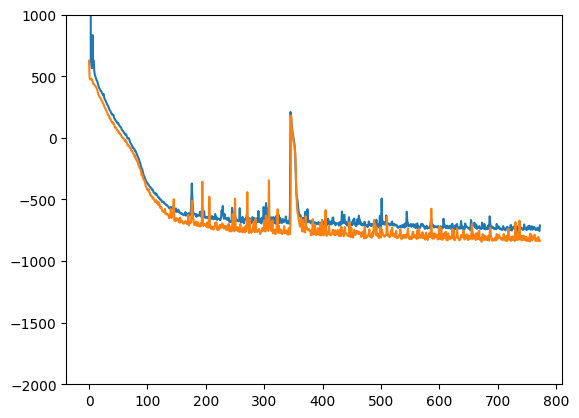

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


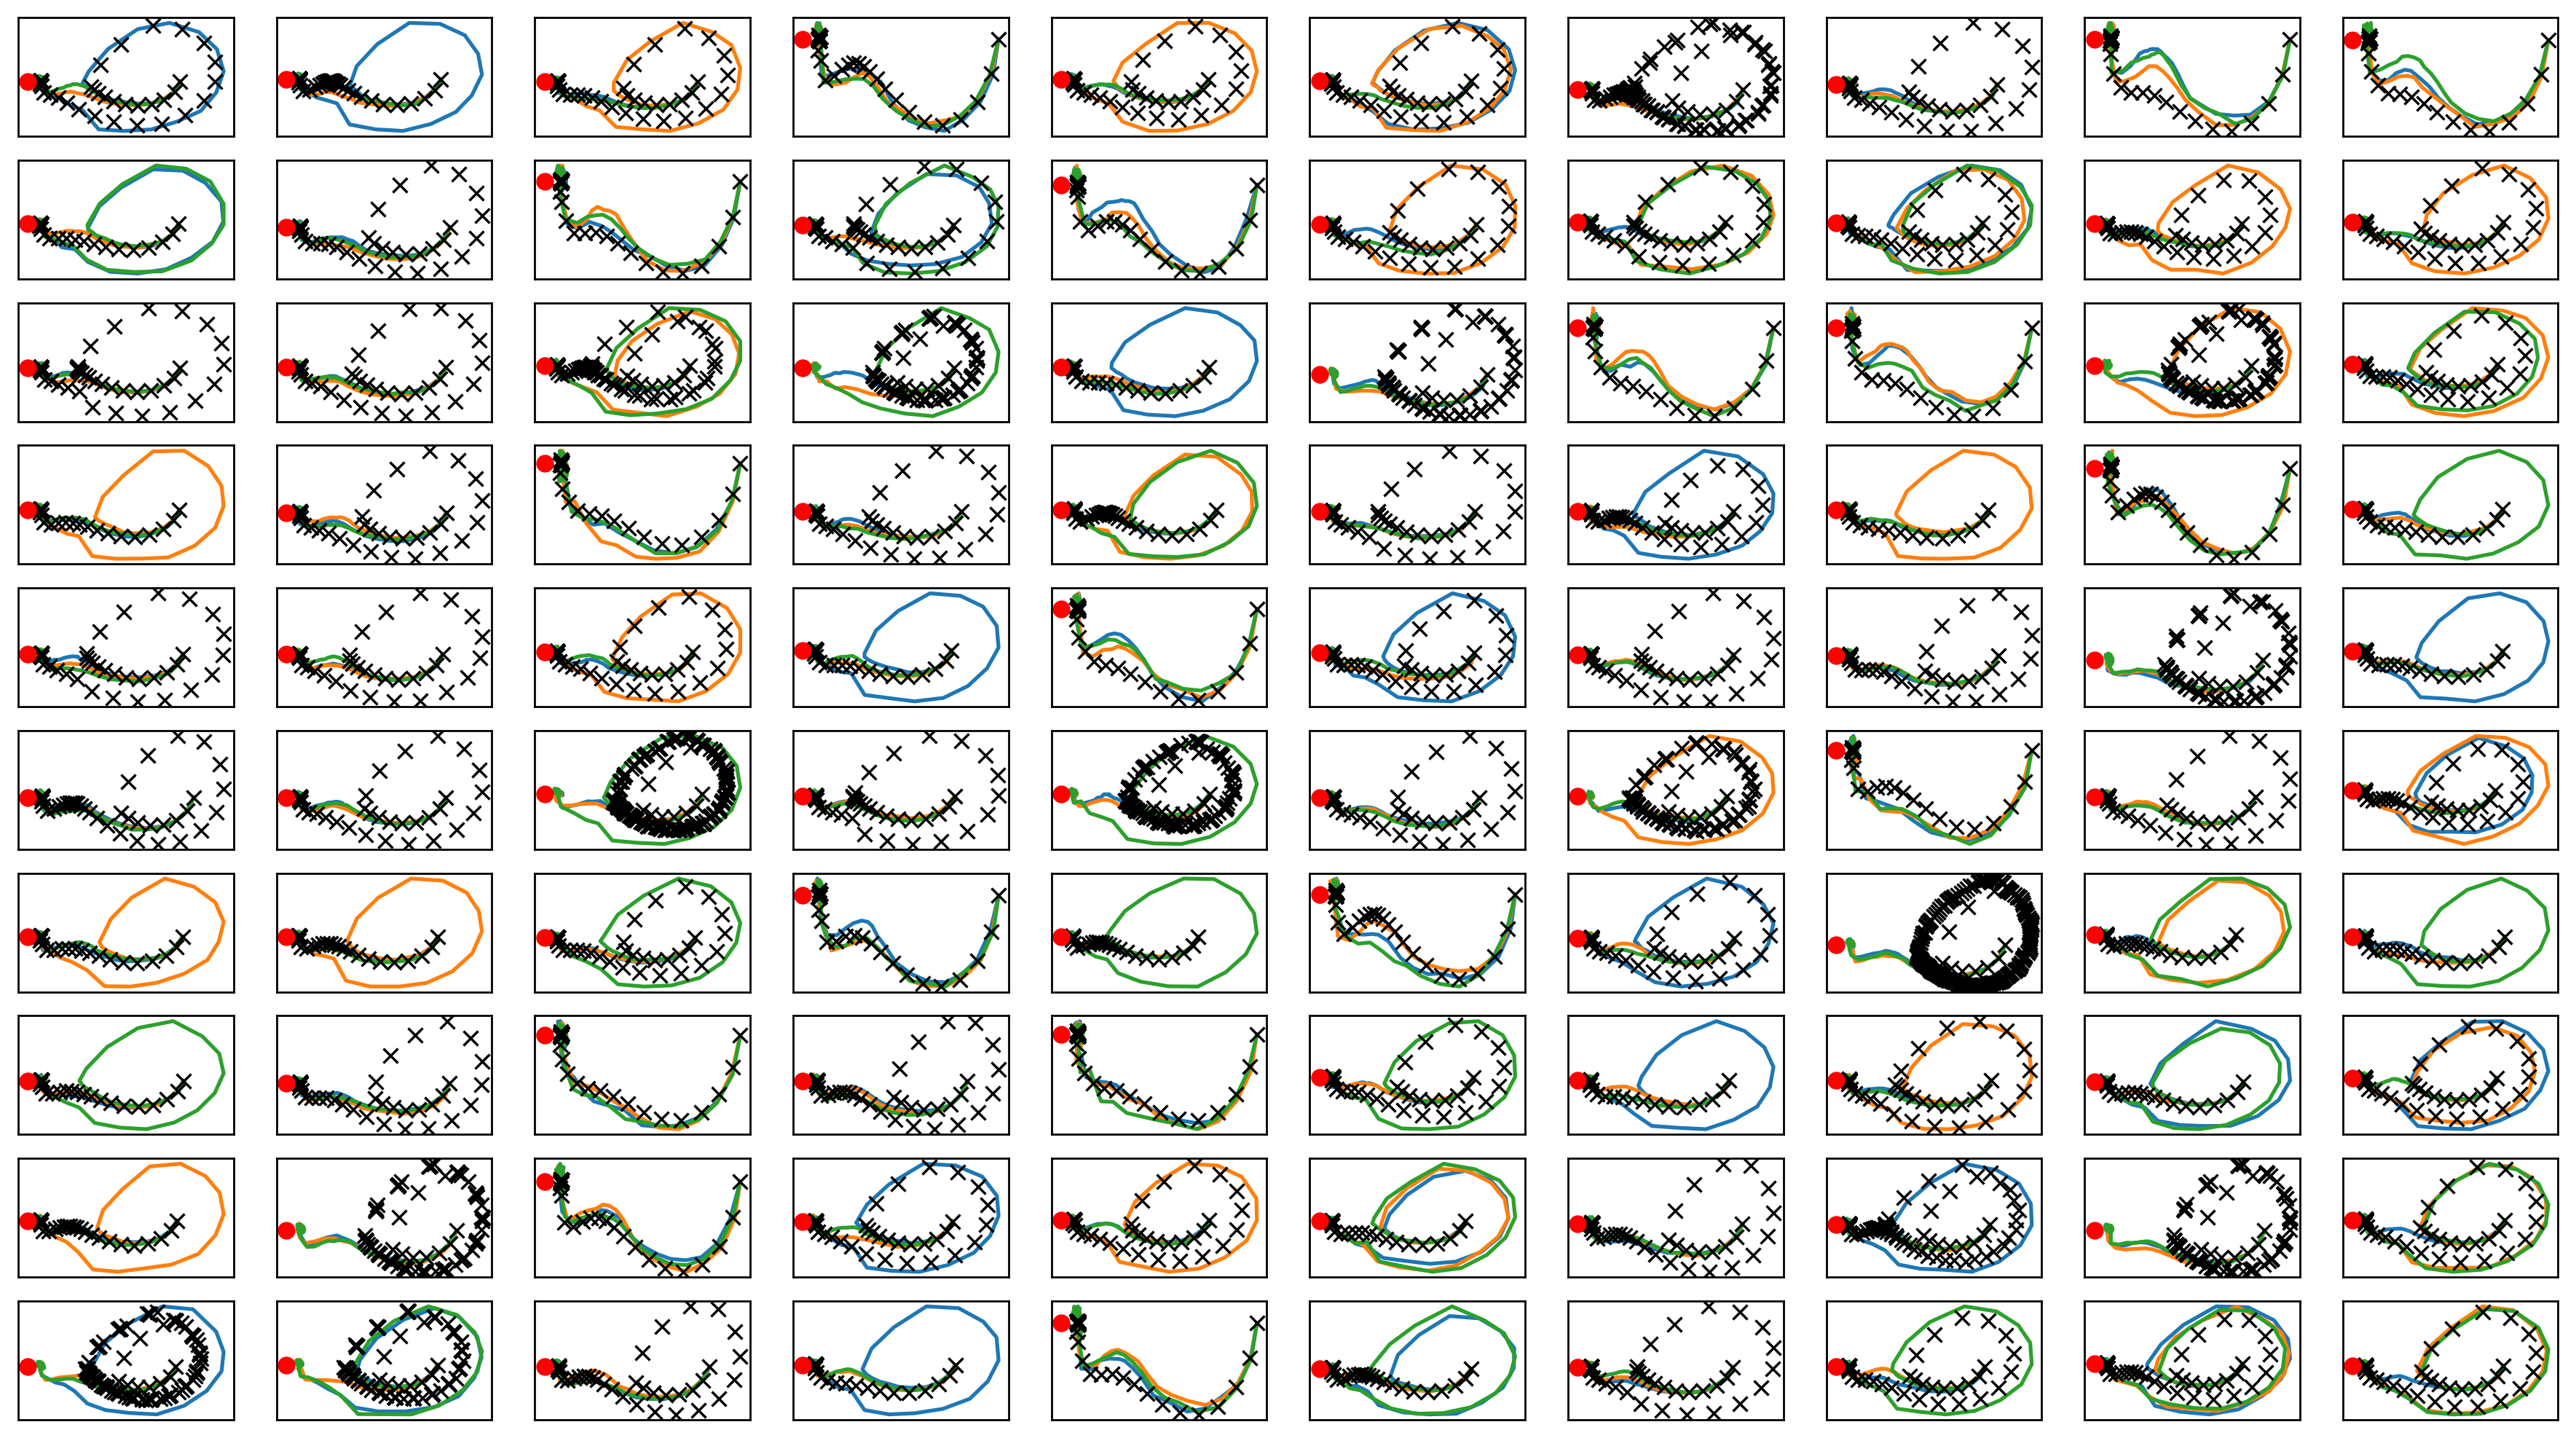

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

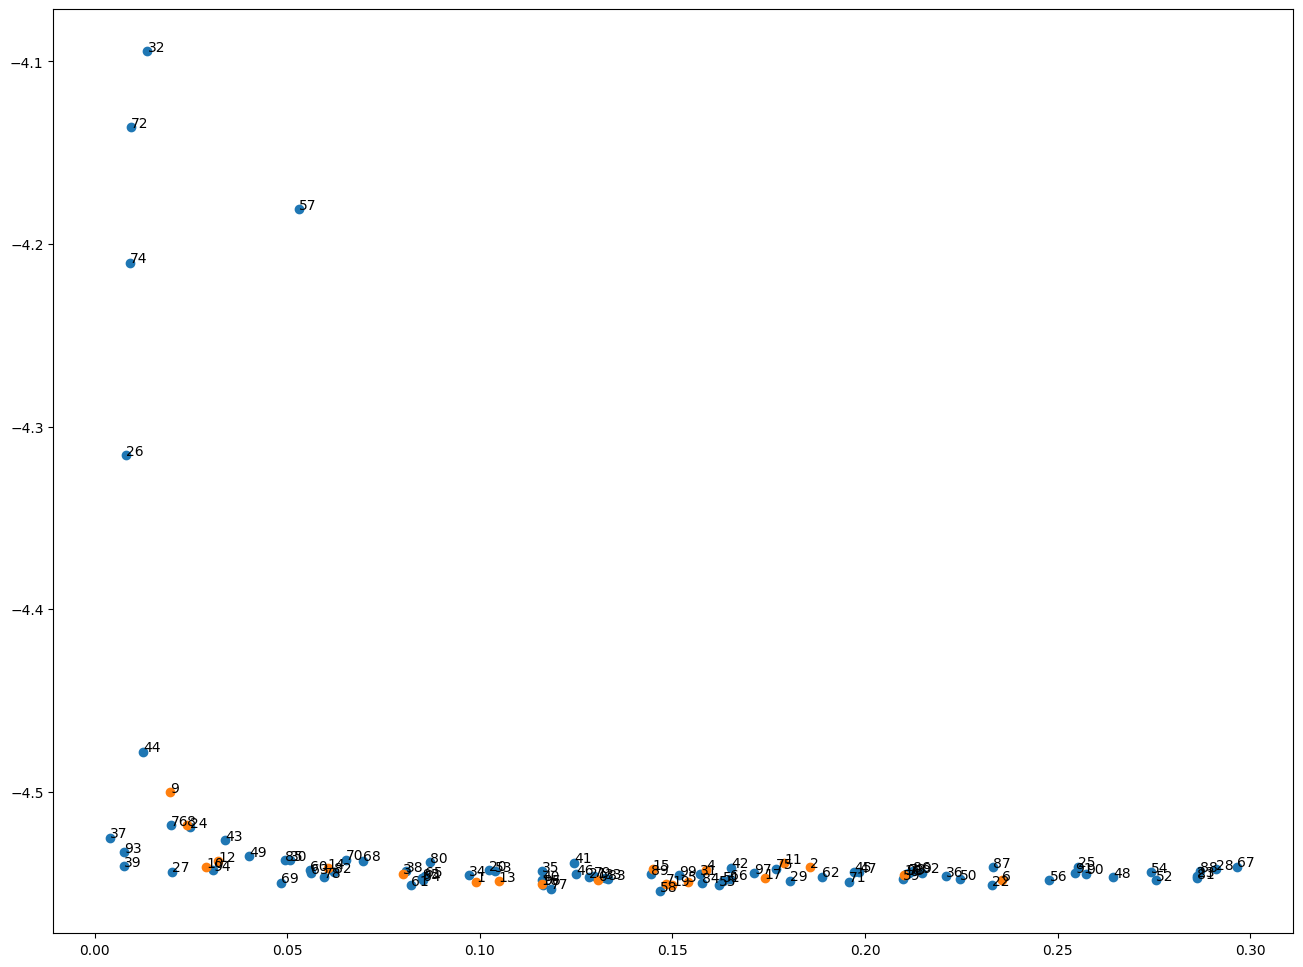

[0.13059672 0.09910045 0.18578129 0.08004818 0.15874263 0.15407344
 0.23560054 0.14827105 0.02389364 0.01958595 0.02895927 0.17902359
 0.03208371 0.10494789 0.06052297 0.14492095 0.1160678  0.17400125
 0.2102257  0.15000251 0.1024841  0.12826379 0.23296776 0.28612267
 0.02462848 0.25525515 0.00816071 0.02014331 0.29117409 0.18054514
 0.05076763 0.15722006 0.01370369 0.13240648 0.0970624  0.11606697
 0.22102412 0.0039052  0.08081664 0.00766528 0.11625703 0.12447175
 0.16529337 0.03383286 0.01253931 0.19725372 0.12502603 0.1984444
 0.26449567 0.04018626 0.22463336 0.16300357 0.27553759 0.10387137
 0.27417464 0.16205745 0.24787495 0.05301365 0.14677985 0.20985619
 0.05598814 0.08221778 0.18880792 0.05618596 0.08512674 0.08568112
 0.16484905 0.29655291 0.06963548 0.04843997 0.06522073 0.19590615
 0.00937427 0.21138825 0.00917684 0.1769346  0.0196991  0.11854523
 0.05940813 0.12971673 0.08712802 0.28609799 0.06211495 0.13337228
 0.15771997 0.04932573 0.21239135 0.2331309  0.28702428 0.14443

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


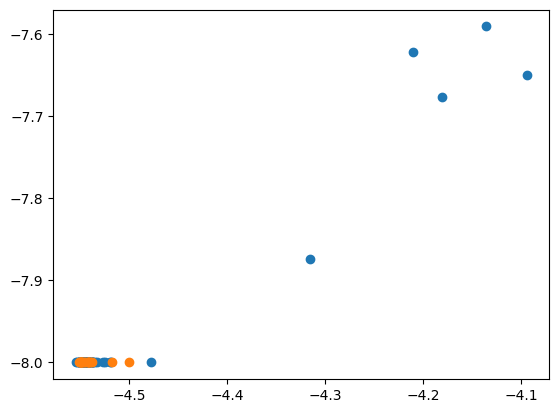

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 10.61540  validloss 11.23698±0.00000  bestvalidloss 11.23698  last_update 0
train: iter 1  trainloss 9.62989  validloss 10.18863±0.00000  bestvalidloss 10.18863  last_update 0
train: iter 2  trainloss 8.78870  validloss 9.27719±0.00000  bestvalidloss 9.27719  last_update 0
train: iter 3  trainloss 8.08433  validloss 8.47295±0.00000  bestvalidloss 8.47295  last_update 0
train: iter 4  trainloss 7.45674  validloss 7.82182±0.00000  bestvalidloss 7.82182  last_update 0
train: iter 5  trainloss 6.92478  validloss 7.23632±0.00000  bestvalidloss 7.23632  last_update 0
train: iter 6  trainloss 6.45447  validloss 6.73880±0.00000  bestvalidloss 6.73880  last_update 0
train: iter 7  trainloss 6.04988  validloss 6.29389±0.00000  bestvalidloss 6.29389  last_update 0
train: iter 8  trainloss 5.68943  validloss 5.88772±0.00000  bestvalidloss 5.88772  last_update 0
train: iter 9  trainloss 5.36357  validloss 5.56452±0.00000  bestvalidloss 5.56452  last_update 0
train: iter 10 

train: iter 84  trainloss 1.00210  validloss 1.02692±0.00000  bestvalidloss 1.02692  last_update 0
train: iter 85  trainloss 0.95271  validloss 0.97743±0.00000  bestvalidloss 0.97743  last_update 0
train: iter 86  trainloss 0.90530  validloss 0.92833±0.00000  bestvalidloss 0.92833  last_update 0
train: iter 87  trainloss 0.85879  validloss 0.88046±0.00000  bestvalidloss 0.88046  last_update 0
train: iter 88  trainloss 0.81292  validloss 0.83430±0.00000  bestvalidloss 0.83430  last_update 0
train: iter 89  trainloss 0.76860  validloss 0.78841±0.00000  bestvalidloss 0.78841  last_update 0
train: iter 90  trainloss 0.72567  validloss 0.74306±0.00000  bestvalidloss 0.74306  last_update 0
train: iter 91  trainloss 0.68309  validloss 0.69946±0.00000  bestvalidloss 0.69946  last_update 0
train: iter 92  trainloss 0.64174  validloss 0.65642±0.00000  bestvalidloss 0.65642  last_update 0
train: iter 93  trainloss 0.59935  validloss 0.61352±0.00000  bestvalidloss 0.61352  last_update 0
train: ite

train: iter 169  trainloss -0.92684  validloss -1.26523±0.00000  bestvalidloss -1.26523  last_update 0
train: iter 170  trainloss -0.94658  validloss -1.28880±0.00000  bestvalidloss -1.28880  last_update 0
train: iter 171  trainloss -0.97907  validloss -1.27609±0.00000  bestvalidloss -1.28880  last_update 1
train: iter 172  trainloss -0.93618  validloss -1.28333±0.00000  bestvalidloss -1.28880  last_update 2
train: iter 173  trainloss -0.94309  validloss -1.28703±0.00000  bestvalidloss -1.28880  last_update 3
train: iter 174  trainloss -0.90623  validloss -1.27481±0.00000  bestvalidloss -1.28880  last_update 4
train: iter 175  trainloss -1.00005  validloss -1.27881±0.00000  bestvalidloss -1.28880  last_update 5
train: iter 176  trainloss -0.96782  validloss -1.29192±0.00000  bestvalidloss -1.29192  last_update 0
train: iter 177  trainloss -0.93503  validloss -1.30667±0.00000  bestvalidloss -1.30667  last_update 0
train: iter 178  trainloss -0.96009  validloss -1.30039±0.00000  bestvali

train: iter 249  trainloss -0.96516  validloss -1.39697±0.00000  bestvalidloss -1.41685  last_update 1
train: iter 250  trainloss -0.98544  validloss -1.37616±0.00000  bestvalidloss -1.41685  last_update 2
train: iter 251  trainloss -0.95584  validloss -1.40601±0.00000  bestvalidloss -1.41685  last_update 3
train: iter 252  trainloss -0.98948  validloss -1.42261±0.00000  bestvalidloss -1.42261  last_update 0
train: iter 253  trainloss -0.97302  validloss -1.41419±0.00000  bestvalidloss -1.42261  last_update 1
train: iter 254  trainloss -0.98143  validloss -1.41332±0.00000  bestvalidloss -1.42261  last_update 2
train: iter 255  trainloss -0.99667  validloss -1.41468±0.00000  bestvalidloss -1.42261  last_update 3
train: iter 256  trainloss -0.99043  validloss -1.41444±0.00000  bestvalidloss -1.42261  last_update 4
train: iter 257  trainloss -0.97183  validloss -1.39964±0.00000  bestvalidloss -1.42261  last_update 5
train: iter 258  trainloss -0.96767  validloss -1.39458±0.00000  bestvali

train: iter 329  trainloss -1.01957  validloss -1.41419±0.00000  bestvalidloss -1.44961  last_update 22
train: iter 330  trainloss -1.03050  validloss -1.41112±0.00000  bestvalidloss -1.44961  last_update 23
train: iter 331  trainloss -0.97492  validloss -1.42363±0.00000  bestvalidloss -1.44961  last_update 24
train: iter 332  trainloss -0.98661  validloss -1.43178±0.00000  bestvalidloss -1.44961  last_update 25
train: iter 333  trainloss -1.01883  validloss -1.42234±0.00000  bestvalidloss -1.44961  last_update 26
train: iter 334  trainloss -0.99155  validloss -1.39770±0.00000  bestvalidloss -1.44961  last_update 27
train: iter 335  trainloss -1.00625  validloss -1.37333±0.00000  bestvalidloss -1.44961  last_update 28
train: iter 336  trainloss -0.97704  validloss -1.44412±0.00000  bestvalidloss -1.44961  last_update 29
train: iter 337  trainloss -0.99745  validloss -1.43513±0.00000  bestvalidloss -1.44961  last_update 30
train: iter 338  trainloss -0.98892  validloss -1.44210±0.00000 

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-4.5222, -4.7833], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 17.04641  validloss 23.03112±0.00000  bestvalidloss 23.03112  last_update 0
train: iter 1  trainloss 8.74879  validloss 13.59663±0.00000  bestvalidloss 13.59663  last_update 0
train: iter 2  trainloss 4.96517  validloss 5.94598±0.00000  bestvalidloss 5.94598  last_update 0
train: iter 3  trainloss 3.88573  validloss 3.47658±0.00000  bestvalidloss 3.47658  last_update 0
train: iter 4  trainloss 3.48316  validloss 2.71977±0.00000  bestvalidloss 2.71977  last_update 0
train: iter 5  trainloss 3.21319  validloss 2.47165±0.00000  bestvalidloss 2.47165  last_update 0
train: iter 6  trainloss 2.96942  validloss 2.30513±0.00000  bestvalidloss 2.30513  last_update 0
train: iter 7  trainloss 2.80522  validloss 2.33993±0.00000  bestvalidloss 2.30513  last_update 1
train: iter 8  trainloss 2.74779  validloss 2.22897±0.00000  bestvalidloss 2.22897  last_update 0
train: iter 9  trainloss 2.67016  validloss 2.10964±0.00000  bestvalidloss 2.10964  last_update 0
train: iter 10 

train: iter 84  trainloss 2.27932  validloss 1.72394±0.00000  bestvalidloss 1.68818  last_update 22
train: iter 85  trainloss 2.26874  validloss 1.88337±0.00000  bestvalidloss 1.68818  last_update 23
train: iter 86  trainloss 2.33556  validloss 1.72230±0.00000  bestvalidloss 1.68818  last_update 24
train: iter 87  trainloss 2.30428  validloss 1.87549±0.00000  bestvalidloss 1.68818  last_update 25
train: iter 88  trainloss 2.31182  validloss 1.88186±0.00000  bestvalidloss 1.68818  last_update 26
train: iter 89  trainloss 2.30249  validloss 1.86644±0.00000  bestvalidloss 1.68818  last_update 27
train: iter 90  trainloss 2.31227  validloss 1.86355±0.00000  bestvalidloss 1.68818  last_update 28
train: iter 91  trainloss 2.32430  validloss 1.81899±0.00000  bestvalidloss 1.68818  last_update 29
train: iter 92  trainloss 2.34557  validloss 1.80648±0.00000  bestvalidloss 1.68818  last_update 30
train: iter 93  trainloss 2.28904  validloss 1.92257±0.00000  bestvalidloss 1.68818  last_update 31


train: iter 167  trainloss 2.25041  validloss 1.80638±0.00000  bestvalidloss 1.67773  last_update 30
train: iter 168  trainloss 2.25681  validloss 1.76888±0.00000  bestvalidloss 1.67773  last_update 31
train: iter 169  trainloss 2.28181  validloss 1.82083±0.00000  bestvalidloss 1.67773  last_update 32
train: iter 170  trainloss 2.28609  validloss 1.78988±0.00000  bestvalidloss 1.67773  last_update 33
train: iter 171  trainloss 2.26847  validloss 1.74732±0.00000  bestvalidloss 1.67773  last_update 34
train: iter 172  trainloss 2.26235  validloss 1.83252±0.00000  bestvalidloss 1.67773  last_update 35
train: iter 173  trainloss 2.27469  validloss 1.74263±0.00000  bestvalidloss 1.67773  last_update 36
train: iter 174  trainloss 2.27205  validloss 1.74517±0.00000  bestvalidloss 1.67773  last_update 37
train: iter 175  trainloss 2.30152  validloss 1.75538±0.00000  bestvalidloss 1.67773  last_update 38
train: iter 176  trainloss 2.26483  validloss 1.72614±0.00000  bestvalidloss 1.67773  last_

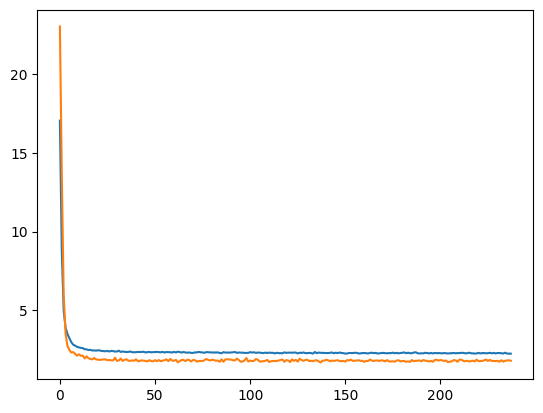

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-9.3054)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-10.3349)


In [21]:
print(vi.h_min_tilde)

-5.709619


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.620286901993086
tensor([1.2925])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

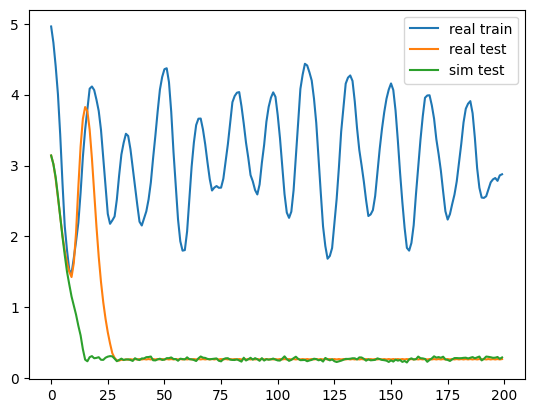

encoder [-4.551287 -8.      ]
initial_belief tensor([-4.5222, -4.7833])
real train tensor([-4.5499, -8.0096])
real test tensor([-4.0709, -7.6488])
sim tensor([-4.5233, -4.7872])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-4.510204081632653


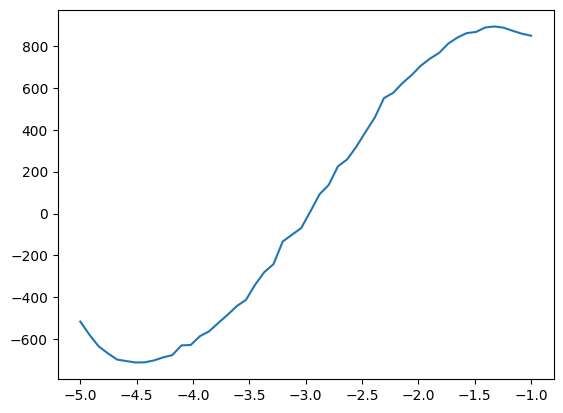

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.25016773218106186
tensor([-1.1499])
